In [1]:
import sys  
import fst
import random
reload(sys)  
sys.setdefaultencoding('utf8')



In [2]:
import random
def ran_lab_prob():
    r = [random.random() for i in range(138)]
    s = sum(r)
    return [i/s for i in r]


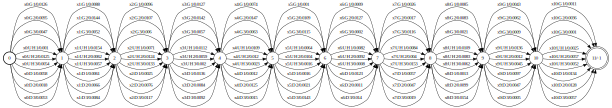

In [6]:
import fst
import random
t = fst.LogTransducer()
sym=fst.SymbolTable()
#10 timesteps
#138 labels 
#for i in range(138):
x=0
for j in range(11):
    label_prob = ran_lab_prob()
    labels = ['x','x','x','x','x','x','x','x','x']
    symbols = ['G1','G2','G3','UH1','UH2','UH3','D1','D2','D3']
    #labels=[i for i in range(138)]
    for i in range(9):
        prob = "%.4f" % label_prob[i]
        t.add_arc(0+x, 1+x,str(labels[i]+str(j)),symbols[i],prob)
    x+=1
t[11].final = -1
t


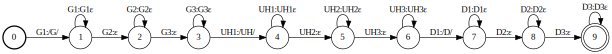

In [16]:
t2=fst.LogTransducer()
#3x3 states for this example


symbols = ['G1','G2','G3','UH1','UH2','UH3','D1','D2','D3']
labels  = ['/G/','/UH/','/D/']
x=0
count=0
for i in range(1,10):
    if i%3==1:
        t2.add_arc(0+x,1+x,symbols[x],labels[count])
    else:
        t2.add_arc(0+x,1+x,symbols[x],sym.find(0))
    t2.add_arc(1+x,1+x,symbols[x],str(symbols[x]+sym.find(0)))
    print "i",i
    if i%3==0:
        count+=1
    x+=1
    
t2[9].final=True
t2


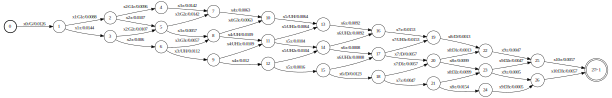

In [17]:
t>>t2

SyntaxError: invalid syntax (<ipython-input-9-583b3100b7c6>, line 2)